## WAHYU PEBRIANTO

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
dirname = 'Chessman-image-dataset/Chess'
dir_chess_folders = os.listdir(dirname)
dir_chess_paths = [os.path.join(dirname, path) for path in dir_chess_folders]

In [3]:
dir_chess_paths

['Chessman-image-dataset/Chess\\Bishop',
 'Chessman-image-dataset/Chess\\King',
 'Chessman-image-dataset/Chess\\Knight',
 'Chessman-image-dataset/Chess\\Pawn',
 'Chessman-image-dataset/Chess\\Queen',
 'Chessman-image-dataset/Chess\\Rook']

In [4]:
def plot_imgs(item_dir, title=" ", num_imgs=4, cmap='viridis'):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(15, 15))
    for idx, img_path in enumerate(item_files):
        plt.subplot(8, 8, idx+1)
        img = plt.imread(img_path, 0)
        plt.title(title)
        plt.imshow(img, cmap=cmap)

    plt.tight_layout()

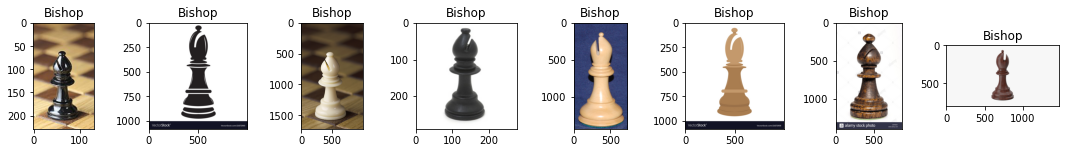

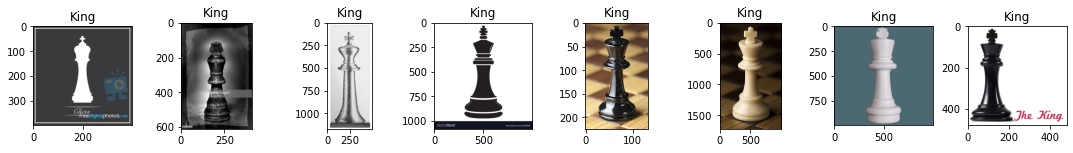

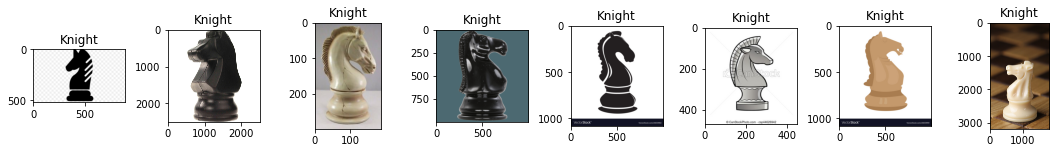

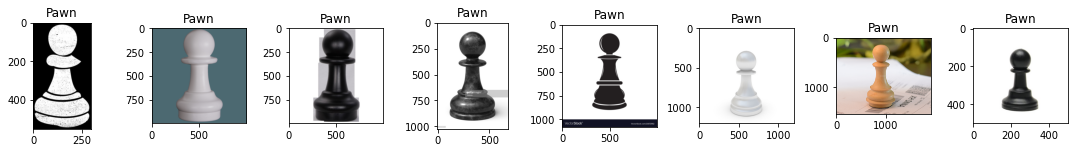

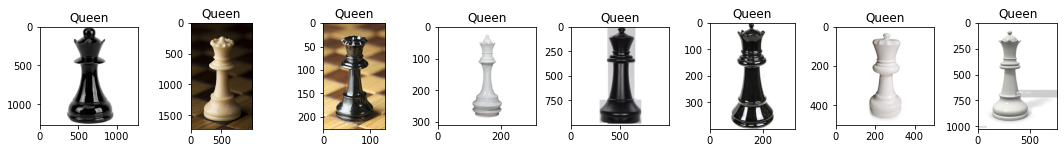

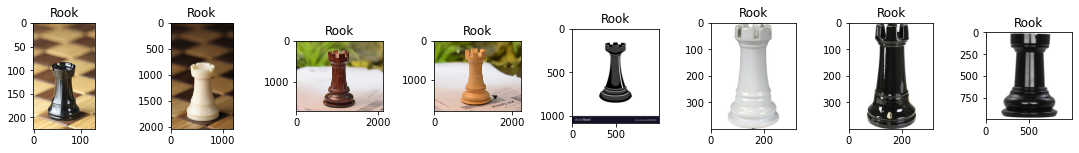

In [5]:
for path in dir_chess_paths:
    head, tail = os.path.split(path)
    plot_imgs(path, tail, 8)

In [6]:
print('total pawn images :', len(os.listdir('Chessman-image-dataset/Chess/Pawn')))
print('total King images :', len(os.listdir('Chessman-image-dataset/Chess/King')))
print('total Knight images :', len(os.listdir('Chessman-image-dataset/Chess/Knight')))

total pawn images : 107
total King images : 76
total Knight images : 106


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_dir = os.path.join('Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.1) # set validation split

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


# MODELING

In [10]:
import tensorflow as tf 

In [11]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(6, activation='softmax')])

In [12]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0

**training model CNN**

In [13]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=10,
                              verbose=2)

Epoch 1/10
63/63 - 30s - loss: 1.8130 - accuracy: 0.1904 - val_loss: 1.7882 - val_accuracy: 0.2308
Epoch 2/10
63/63 - 29s - loss: 1.7868 - accuracy: 0.1764 - val_loss: 1.7820 - val_accuracy: 0.1923
Epoch 3/10
63/63 - 29s - loss: 1.7789 - accuracy: 0.2144 - val_loss: 1.7566 - val_accuracy: 0.3269
Epoch 4/10
63/63 - 31s - loss: 1.7533 - accuracy: 0.2465 - val_loss: 1.7793 - val_accuracy: 0.2308
Epoch 5/10
63/63 - 33s - loss: 1.7271 - accuracy: 0.2645 - val_loss: 1.7900 - val_accuracy: 0.1923
Epoch 6/10
63/63 - 32s - loss: 1.7146 - accuracy: 0.2605 - val_loss: 1.7740 - val_accuracy: 0.2308
Epoch 7/10
63/63 - 32s - loss: 1.6820 - accuracy: 0.3146 - val_loss: 1.7818 - val_accuracy: 0.2308
Epoch 8/10
63/63 - 31s - loss: 1.6268 - accuracy: 0.3226 - val_loss: 1.7013 - val_accuracy: 0.3077
Epoch 9/10
63/63 - 30s - loss: 1.5795 - accuracy: 0.3066 - val_loss: 1.7373 - val_accuracy: 0.3654
Epoch 10/10
63/63 - 33s - loss: 1.5536 - accuracy: 0.3727 - val_loss: 1.6281 - val_accuracy: 0.3846


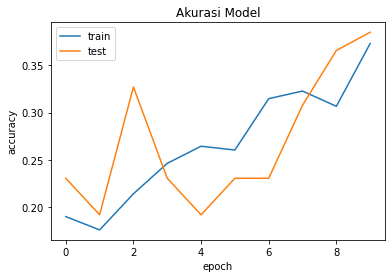

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

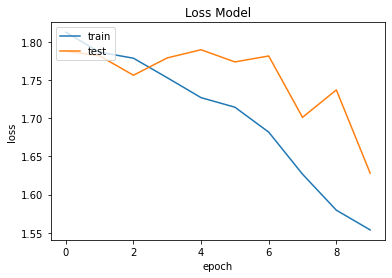

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()